# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

## Portfolios
*Review portfolio settings*

In [4]:
PM.review('portfolio')

Portfolio: MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, FCTR, TEST


In [5]:
PM.review_portfolio('WTR_2412')

{'strategy': 'WTR',
 'universe': 'UV_WTR',
 'file': 'pf_wtr2412_static',
 'path': 'transaction'}

In [6]:
#PM.review_strategy('WTR')
PM.review_portfolio('WTR_2412', strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally'}

In [7]:
#PM.review_universe('UV_WTR')
PM.review_portfolio('WTR_2412', universe=True)

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'to_daily': False,
 'path': 'data'}

In [8]:
c = PM.get_cost('UV_WTR', file_cost, path_tran)
c['buy']

Cost data transaction_cost_241217.csv loaded


ticker
069500    0.004209
273130    0.004209
379800    0.004209
411060    0.004209
148070    0.004209
284430    0.004209
Name: buy, dtype: float64

# Universe

In [9]:
PM.review('universes')

Universe: UV_K200, UV_KRX, UV_LIQ, UV_WTR, UV_ETF, UV_FUND, UV_FCTR


In [10]:
WidgetUniverse

## K200

In [11]:
k200 = PM.create_universe('UV_K200')

200 securities from 2022-01-03 to 2025-01-20 uploaded.
Price data loaded


In [12]:
#k200.portfolio_data
#k200.get_names()

In [14]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1)
)
k200.download(**kw) if WidgetUniverse.values(0) else None

... done
200 securities from 2022-01-03 to 2025-01-31 downloaded.
kospi200_prices_250131.csv saved
df_prices updated
Execution time of download: 28.79 secs


## KRX

In [32]:
krx = PM.create_universe('UV_KRX')

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
Price data loaded


In [15]:
#krx.get_names()

In [16]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
#krx.download(**kw) if WidgetUniverse.values(0) else None

## WTR

In [15]:
wtr = PM.create_universe('UV_WTR')

6 securities from 2022-01-03 to 2025-01-20 uploaded.
Price data loaded


In [16]:
wtr.get_names('selected')

0) 069500: KODEX 200
1) 379800: KODEX 미국S&P500
2) 273130: KODEX 종합채권(AA-이상)액티브
3) 411060: ACE KRX금현물
4) 148070: KIWOOM 국고채10년
5) 284430: KODEX 200미국채혼합

In [17]:
#PM.review_universe('UV_WTR')

In [18]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers = ['069500', '273130', '148070', '379800', '411060', '284430']
    tickers = 'selected'
)
wtr.download(**kw) if WidgetUniverse.values(0) else None

... done
6 securities from 2022-01-03 to 2025-01-31 downloaded.
etfs_weather_250131.csv saved
df_prices updated
Execution time of download: 0.69 secs


In [21]:
#wtr.save()

## FCTR

In [73]:
fctr = PM.create_universe('UV_FCTR')

7 securities from 2021-01-04 to 2024-11-22 uploaded.
Price data loaded


In [74]:
fctr.get_names()

0) LRGF: iShares U.S. Equity Factor ETF
1) MTUM: iShares MSCI USA Momentum Factor ETF
2) QUAL: iShares MSCI USA Quality Factor ETF
3) SIZE: iShares MSCI USA Size Factor ETF
4) SPY: SPDR S&P 500 ETF Trust
5) USMV: iShares MSCI USA Min Vol Factor ETF
6) VLUE: iShares MSCI USA Value Factor ETF

In [75]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    tickers=['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
    #tickers='selected'
)
fctr.download(**kw) if WidgetUniverse.values(0) else None

[*********************100%***********************]  7 of 7 completed

... done
7 securities from 2021-01-04 to 2024-12-13 downloaded.
etfs_factors_241213.csv saved
df_prices updated
Execution time of download: 1.38 secs


## FUND

In [22]:
fund = PM.create_universe('UV_FUND')

64 securities from 2008-11-28 to 2024-12-31 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded


In [71]:
kw = dict(
    n_years=20, 
    #close_today = WidgetUniverse.values(1),
    #tickers='selected',
    overwrite=True
)
fund.download(**kw) if WidgetUniverse.values(0) else None

64 tickers set


100%|███████████████████████████████████████████████████████████████| 64/64 [00:28<00:00,  2.28it/s]

28.1 secs elapsed, 0.5 secs paused (1.8%)
Max error of conversions: 6.69e-05
... done
64 securities from 2008-11-28 to 2024-12-31 downloaded.
funds_prices_241231.csv saved
REMINDER: 0 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
df_prices updated
Execution time of download: 28.26 secs


In [7]:
#fund.portfolio_data['universe']

### Case: Cost

In [23]:
universe = 'UV_FUND'
fund = PM.create_universe(universe)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)
fee = cost['fee']

64 securities from 2008-11-28 to 2024-12-31 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_241217.csv loaded


In [24]:
tickers = {k:v for k,v in fund.security_names.items() if 'TDF2045' in v}
tickers = list(tickers.keys())

In [25]:
tickers = ['K55301BU5479', 'K55234DF2988', 'K55223BT1757']
fund.get_names(tickers)

0) K55301BU5479: 미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e
1) K55234DF2988: IBK로우코스트TDF2045증권자투자신탁[혼합-재간접형]종류C-Re
2) K55223BT1757: KB온국민TDF2045증권투자신탁(주식혼합-재간접형)C-퇴직e

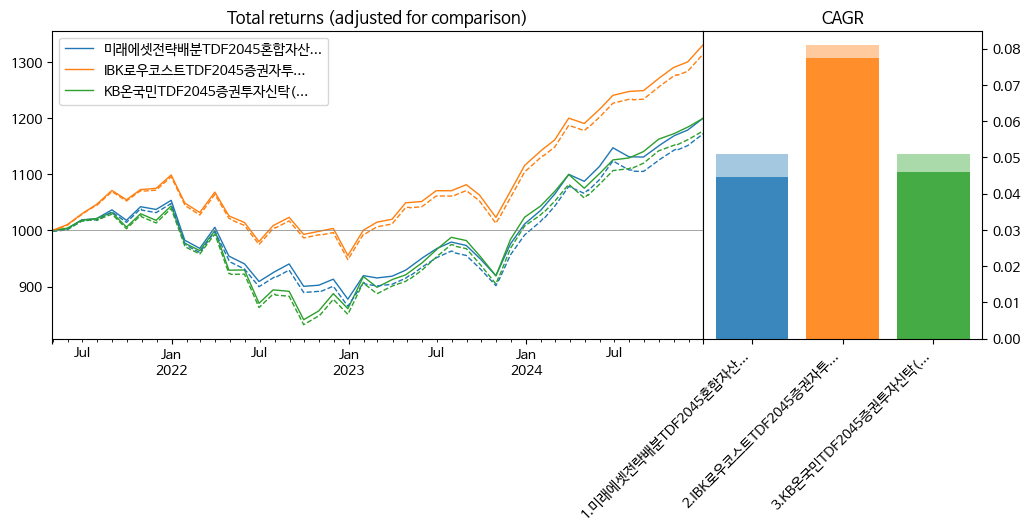

In [26]:
fund.plot(tickers, fee=fee, base=1000)

## LIQ

In [19]:
# portfolio of past trading system to liquidate soon
selected = [
    '011780', '066570', '035890', '040420', '140520', 
    '072990', '091580', '011200', '002220', '006650', 
    '136490', '064550', '460860', '040910', '024950',
    '900070', '036580', '184230', '460850', '016250',
    '001230', '049470', '217820', '109960'
]

In [20]:
liq = PM.create_universe('UV_LIQ')

24 securities from 2022-01-03 to 2025-01-20 uploaded.
Price data loaded


In [21]:
#liq.get_names()

In [22]:
kw = dict(
    n_years=3, 
    tickers= 'selected', #selected,
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
liq.download(**kw) if WidgetUniverse.values(0) else None

REMINDER: 24 tickers set regardless of market


100%|███████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.99it/s]

2.4 secs elapsed, 0.0 secs paused (0.0%)
... done
24 securities from 2022-01-03 to 2025-01-31 downloaded.
krx_liq_prices_250131.csv saved
df_prices updated
Execution time of download: 2.97 secs


## Additional Data

### Cost

*Check missing cost data*

In [29]:
PM.check_cost('UV_FUND', file_cost, path_tran)

Cost data transaction_cost_241217.csv loaded
64 securities from 2008-11-28 to 2024-12-31 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded


*Update cost data for uiniverse UV_FUND, except for which of universes updated with manual editting*

In [30]:
fd = FundDownloader.create(fund)
#fd.export_cost('UV_FUND', 'transaction_cost', path=path_tran, update=True)
fd.export_cost('UV_FUND')

Data for 64 funds loaded.


,universe,ticker,buy,sell,fee,tax
0,UV_FUND,K55234DF2657,0.0,0.0,0.410,0.0
1,UV_FUND,K55234DF2459,0.0,0.0,0.410,0.0
2,UV_FUND,K55301BU6139,0.0,0.0,0.600,0.0
3,UV_FUND,K55105BU1161,0.0,0.0,0.420,0.0
4,UV_FUND,K55210BU2385,0.0,0.0,0.500,0.0
...,...,...,...,...,...,...
59,UV_FUND,K55105BT9936,0.0,0.0,0.540,0.0
60,UV_FUND,K55223BT1096,0.0,0.0,0.360,0.0
61,UV_FUND,K55301BU6113,0.0,0.0,0.570,0.0
62,UV_FUND,K55101BT4402,0.0,0.0,0.439,0.0


### Financial Ratio

In [4]:
WidgetUniverse

In [5]:
file = 'kospi200_ratios.csv'
fr = FinancialRatios(file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-01-03 loaded


In [13]:
start_fr = '2023-01-01'
universe = 'UV_K200'
freq = 'day'

if WidgetUniverse.values(0):
    tickers = PM.create_universe(universe).df_prices.columns.to_list()
    kw = dict(
        freq = freq,
        close_today = WidgetUniverse.values(1)
    )
    fr.download(tickers, start_fr, **kw)

In [10]:
fratio = 'PER'
df_ratio = fr.util_reshape(fratio, stack=False)

In [11]:
df = PM.create_universe(universe).df_prices
fr.util_compare_periods(df)

200 securities from 2022-01-03 to 2025-01-20 uploaded.
Price data loaded
Ratio: 2023-01-02 ~ 2025-01-03
Price: 2022-01-03 ~ 2025-01-20


# Performance

In [23]:
PM.review()

Portfolio: MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, FCTR, TEST


In [24]:
pf_list = ['MMT_2407', 'PER_2410', 'WTR_2407', 'WTR_2412']
pm = PM(pf_list)

MMT_2407:
200 securities from 2022-01-03 to 2025-01-31 uploaded.
Price data loaded
Transaction record to 2025-01-16 loaded

PER_2410:
200 securities from 2022-01-03 to 2025-01-31 uploaded.
Price data loaded
Transaction record to 2024-11-11 loaded
Run check_universe to get the list of missing assets

WTR_2407:
6 securities from 2022-01-03 to 2025-01-31 uploaded.
Price data loaded
Transaction record to 2024-11-20 loaded

WTR_2412:
6 securities from 2022-01-03 to 2025-01-31 uploaded.
Price data loaded
Transaction record to 2024-12-18 loaded



In [6]:
#pm.load('LIQ')
pm.load(['TDF_2406','HANA_2408'])

TDF_2406:
64 securities from 2008-11-28 to 2024-12-31 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded
Transaction record to 2025-01-15 loaded

HANA_2408:
64 securities from 2008-11-28 to 2024-12-31 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded
Transaction record to 2024-08-01 loaded



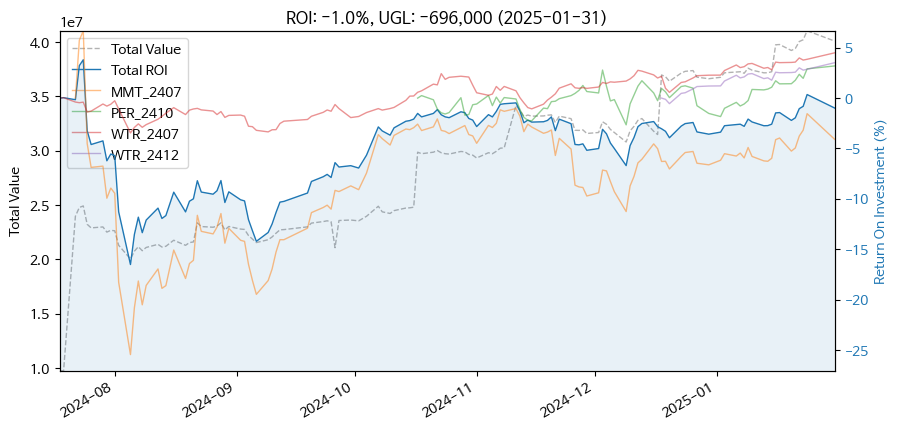

In [25]:
start_date='2024-07-01'
#pm.plot('MMT', start_date=start_date)
#pm.plot(pf_list, start_date=start_date)
pm.plot(start_date=start_date, roi=True)

In [26]:
w_date

DatePicker(value=None, layout=Layout(width='200px'), step=1)

In [27]:
pm.summary(date=w_date.value)

,MMT_2407,PER_2410,WTR_2407,WTR_2412,TOTAL
start,2024-07-22,2024-10-17,2024-07-18,2024-12-18,2024-07-18
end,2025-01-31,2025-01-31,2025-01-31,2025-01-31,2025-01-31
buy,"42,593,500","12,249,820","10,049,835","5,783,200","70,676,355"
sell,"26,824,951","2,621,865","437,755",0.0,"29,884,571"
value,"14,027,000","10,018,950","10,063,722","5,986,438","40,096,110"
ugl,"-1,741,549","390,995","451,642","203,238","-695,674"
roi,-0.040888,0.031918,0.04494,0.035143,-0.009843


# Transaction

## MMT

In [4]:
pf_mmt = PM.create_portfolio('MMT_2407', **kw_cost) 

200 securities from 2022-01-03 to 2025-01-31 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2025-01-16 loaded


In [5]:
# run after editting record file
pf_mmt.update_record()

In [6]:
pf_mmt.view_record(-2, nshares=False)

name     ratio  transaction      net  weight  \
date       ticker                                                        
2024-12-16 267260     HD현대일렉트릭  0.975610      -389500  2726500     0.2   
           010130         고려아연  1.000858      2330000  2330000     0.2   
           003230         삼양식품  1.000000     -1458000  2187000     0.2   
           000150           두산  0.963303      2725000  2725000     0.2   
           298040        효성중공업  0.985808      2290000  2290000     0.2   
           012450    한화에어로스페이스  1.040650     -2152501        0     0.0   
           064350         현대로템  1.026943     -2316000        0     0.0   
           079550       LIG넥스원  1.004130     -2130700        0     0.0   
2025-01-16 267260     HD현대일렉트릭  1.000000            0  2922500     0.2   
           003230         삼양식품  1.000000            0  2310000     0.2   
           000150           두산  1.000000            0  2880000     0.2   
           012450    한화에어로스페이스  1.031414      2673999  2674000     0.2   
           010120  LS ELECTRIC  0.899535      3225000  3225000     0.2   
           010130         고려아연  0.957796     -1706000        0     0.0   
           298040        효성중공업  0.997872     -2350000        0     0.0   

                   weight*      date*  
date       ticker                      
2024-12-16 267260    0.222 2024-12-17  
           010130    0.190 2024-12-17  
           003230    0.178 2024-12-17  
           000150    0.222 2024-12-17  
           298040    0.187 2024-12-17  
           012450    0.000 2024-12-17  
           064350    0.000 2024-12-17  
           079550    0.000 2024-12-17  
2025-01-16 267260    0.209 2025-01-17  
           003230    0.165 2025-01-17  
           000150    0.206 2025-01-17  
           012450    0.191 2025-01-17  
           010120    0.230 2025-01-17  
           010130    0.000 2025-01-17  
           298040    0.000 2025-01-17

*daily transactions for book keeping*

In [7]:
pf_mmt.get_cash_history(cumsum=False, date_actual=True)

,buy,sell
date*,,
2024-07-22,14255518,0
2024-08-22,6159324,4321649
2024-09-26,0,2819812
2024-09-27,2825103,0
2024-10-08,3072111,3348589
2024-11-11,3038510,3805898
2024-12-17,7345267,8431189
2025-01-17,5899213,4048551


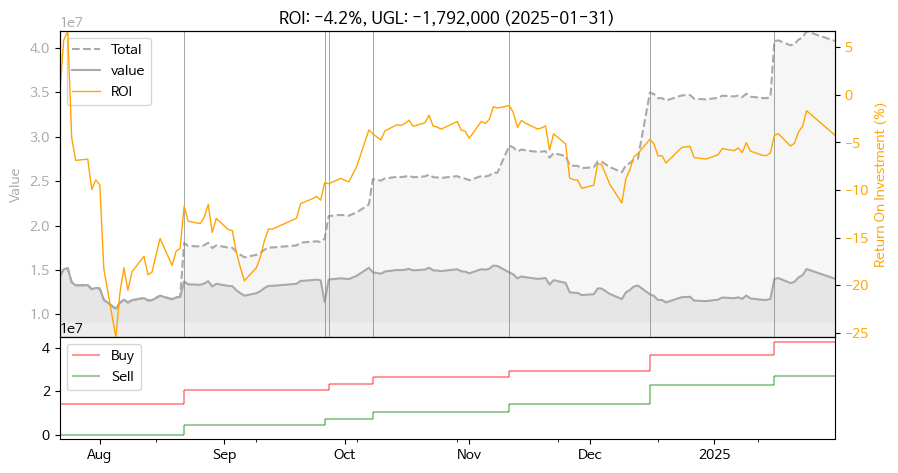

In [8]:
pf_mmt.plot()

In [9]:
date = None
pf_mmt.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-22, 2025-01-31, 42595050, 26775690, 14027000, -1792360, -0.042079078576902185


start    2024-07-22
end      2025-01-31
buy      42,595,050
sell     26,775,690
value    14,027,000
ugl      -1,792,360
roi       -0.042079
dtype: object

In [10]:
#pf_mmt.valuate(date, total=False)

In [11]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [12]:
kw = dict(
    #halt = ['079550'],
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
_ = pf_mmt.transaction_halt(**kw) 

Updated with transaction on 2025-01-31
Set save=True to save transaction record


In [13]:
kw = dict(
    nshares = True,
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
)

_ = pf_mmt.transaction_pipeline(**kw)

5 tickers selected by Total return from 2024-01-24 to 2025-01-24
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 5 %
ROI: -4.1%, UGL: -1,794,932 (2025-01-31)
Set save=True to save transaction record


In [14]:
pf_mmt.view_record(-2, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                           
2025-01-16 000150           두산  288000            0   10     0.2    0.206   
           003230         삼양식품  770000            0    3     0.2    0.165   
           010120  LS ELECTRIC  215000           15   15     0.2    0.230   
           010130         고려아연  853000           -1    0     0.0    0.000   
           012450    한화에어로스페이스  382000            6    7     0.2    0.191   
           267260     HD현대일렉트릭  417500            0    7     0.2    0.209   
           298040        효성중공업  470000           -5    0     0.0    0.000   
2025-01-31 000150           두산  284000           -1    9     0.2    0.192   
           003230         삼양식품  684000            1    4     0.2    0.205   
           010120  LS ELECTRIC  231000           -3   12     0.2    0.208   
           012450    한화에어로스페이스  400000            0    7     0.2    0.210   
           267260     HD현대일렉트릭  410000           -1    6     0.2    0.185   

                       date*  
date       ticker             
2025-01-16 000150 2025-01-17  
           003230 2025-01-17  
           010120 2025-01-17  
           010130 2025-01-17  
           012450 2025-01-17  
           267260 2025-01-17  
           298040 2025-01-17  
2025-01-31 000150 2025-01-31  
           003230 2025-01-31  
           010120 2025-01-31  
           012450 2025-01-31  
           267260 2025-01-31

## KRX
*simulation*

In [48]:
pf_krx = PM.create_portfolio('KRX', **kw_cost)

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded
REMINDER: make sure this is 1st transaction as no records provided


In [20]:
pf_krx.view_record(-2)

No transaction record imported


In [21]:
pf_krx.valuate()

In [22]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [23]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True
)

_ = pf_krx.transaction_pipeline(**kwargs_trs)
pf_krx.view_record(-2)

Liquidation set to None
5 tickers selected by Total return from 2023-08-02 to 2024-08-02
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: -3.7%, UGL: -364,000  (2024-10-08)
Set save=True to save transaction record


name  ratio  transaction      net  weight  weight*  \
date       ticker                                                         
2024-09-02 078860  엔에스이엔엠      1      1998150  1998150     0.2    0.201   
           016670     디모아      1      1996800  1996800     0.2    0.201   
           033790      피노      1      1996750  1996750     0.2    0.201   
           159910   스킨앤스킨      1      1999880  1999880     0.2    0.202   
           196170    알테오젠      1      1932000  1932000     0.2    0.195   

                       date*  
date       ticker             
2024-09-02 078860 2024-09-02  
           016670 2024-09-02  
           033790 2024-09-02  
           159910 2024-09-02  
           196170 2024-09-02

## PER

In [4]:
file = 'kospi200_ratios.csv'
df_ratio = FinancialRatios.util_get_ratio('PER', file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-01-03 loaded


In [5]:
pf_per = PM.create_portfolio('PER_2410', df_additional=df_ratio, **kw_cost)

200 securities from 2022-01-03 to 2025-01-20 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2024-11-11 loaded
Run check_universe to get the list of missing assets


*Set assets to liquidate as delisted from KOSPI200*

In [6]:
tickers = pf_per.check_universe()
df_liq = pf_per.util_get_prices(tickers)

security_names updated


In [7]:
#pf_per.portfolio_data

In [8]:
pf_per.view_record(-2)

name     ratio  transaction      net  weight  weight*  \
date       ticker                                                             
2024-10-17 010060   OCI홀딩스  0.992504       933800   933800    0.20    0.189   
           003030   세아제강지주  0.995439       986700   986700    0.20    0.200   
           009970  영원무역홀딩스  1.006742       979000   979000    0.20    0.198   
           016380     KG스틸  0.986364      1016400  1016400    0.20    0.206   
           047040     대우건설  1.000000      1019940  1019940    0.20    0.207   
2024-11-11 010060   OCI홀딩스  1.006689      -358800   478400    0.05    0.050   
           003030   세아제강지주  0.994309      -773200   386600    0.05    0.040   
           009970  영원무역홀딩스  0.997666      -514200   428500    0.05    0.045   
           016380     KG스틸  1.001517      -514020   500840    0.05    0.052   
           047040     대우건설  0.993122      -461645   508900    0.05    0.053   
           088350     한화생명  1.001745       515700   515700    0.05    0.054   
           078930       GS  1.002404       499200   499200    0.05    0.052   
           111770     영원무역  0.996264       481800   481800    0.05    0.050   
           139130  DGB금융지주  1.004848       519750   519750    0.05    0.054   
           005830   DB손해보험  1.016838       427600   427600    0.05    0.044   
           001450     현대해상  1.000000       505750   505750    0.05    0.053   
           009900     명신산업  1.008715       495720   495720    0.05    0.052   
           241560     두산밥캣  0.995000       520000   520000    0.05    0.054   
           000270       기아  1.010684       468000   468000    0.05    0.049   
           024110     기업은행  1.002059       509950   509950    0.05    0.053   
           005850      에스엘  1.014354       501600   501600    0.05    0.052   
           316140   우리금융지주  1.001244       514560   514560    0.05    0.054   
           138930  BNK금융지주  1.003181       518650   518650    0.05    0.054   
           005380      현대차  1.007160       419000   419000    0.05    0.044   
           017800   현대엘리베이  1.084233       416700   416700    0.05    0.043   

                       date*  
date       ticker             
2024-10-17 010060 2024-10-17  
           003030 2024-10-17  
           009970 2024-10-17  
           016380 2024-10-17  
           047040 2024-10-17  
2024-11-11 010060 2024-11-11  
           003030 2024-11-11  
           009970 2024-11-11  
           016380 2024-11-11  
           047040 2024-11-11  
           088350 2024-11-11  
           078930 2024-11-11  
           111770 2024-11-11  
           139130 2024-11-11  
           005830 2024-11-11  
           001450 2024-11-11  
           009900 2024-11-11  
           241560 2024-11-11  
           000270 2024-11-11  
           024110 2024-11-11  
           005850 2024-11-11  
           316140 2024-11-11  
           138930 2024-11-11  
           005380 2024-11-11  
           017800 2024-11-11

In [9]:
pf_per.valuate()

start    2024-10-17
end      2025-01-20
buy      12,250,266
sell      2,617,050
value     9,802,940
ugl         169,724
roi        0.013855
dtype: object

In [10]:
#pf_per.update_record()
#pf_per.view_record(-2)

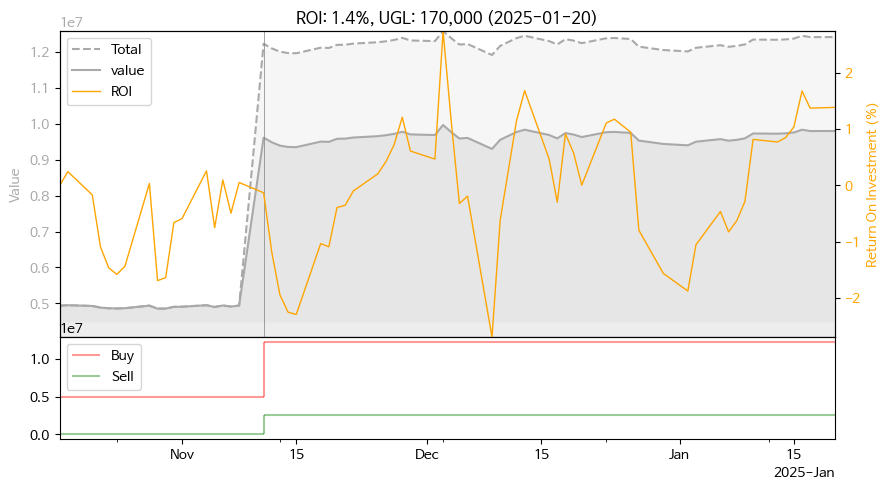

In [11]:
pf_per.plot()

In [12]:
start_fr = '2023-01-01'
_ = pf_per.check_additional(start_fr)

Tickers 009900, 016380 added to universe
Returning price and additional


In [13]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [16]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True
)

kw_liq = dict(
    #securities_to_sell = df_liq,
    securities_to_sell = tickers,
    hold = False
)

_ = pf_per.transaction_pipeline(**kwargs_trs, **kw_liq)
pf_per.view_record(-1)

Liquidation prepared
20 tickers selected by Financial Ratio from 2024-09-30 to 2024-11-29
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 4 %
Tickers 009900, 016380 added to universe
ROI: -1.9%, UGL: -262,036 (2025-01-20)
Set save=True to save transaction record


name  ratio  transaction     net  weight  weight*  \
date       ticker                                                         
2024-11-29 010060   OCI홀딩스    1.0            0  476000    0.05    0.052   
           003030   세아제강지주    1.0            0  343000    0.05    0.037   
           009970  영원무역홀딩스    1.0            0  430000    0.05    0.047   
           047040     대우건설    1.0       -33210  483390    0.05    0.052   
           088350     한화생명    1.0            0  485100    0.05    0.053   
           078930       GS    1.0       -41800  459800    0.05    0.050   
           111770     영원무역    1.0       -40950  450450    0.05    0.049   
           139130  DGB금융지주    1.0       -79830  478980    0.05    0.052   
           005830   DB손해보험    1.0            0  436800    0.05    0.047   
           001450     현대해상    1.0        26600  478800    0.05    0.052   
           241560     두산밥캣    1.0       -38800  465600    0.05    0.050   
           000270       기아    1.0            0  464500    0.05    0.050   
           005850      에스엘    1.0       -30750  461250    0.05    0.050   
           024110     기업은행    1.0       -44640  476160    0.05    0.052   
           005380      현대차    1.0            0  437000    0.05    0.047   
           028050    삼성E&A    1.0       484650  484650    0.05    0.052   
           316140   우리금융지주    1.0       -50130  484590    0.05    0.052   
           138930  BNK금융지주    1.0      -105600  475200    0.05    0.051   
           105630     한세실업    1.0       481440  481440    0.05    0.052   
           383220      F&F    1.0       481500  481500    0.05    0.052   
           009900     명신산업    1.0      -500040       0    0.00    0.000   
           016380     KG스틸    1.0        13200       0    0.00    0.000   
           017800   현대엘리베이    1.0      -480600       0    0.00    0.000   

                       date*  
date       ticker             
2024-11-29 010060 2024-11-29  
           003030 2024-11-29  
           009970 2024-11-29  
           047040 2024-11-29  
           088350 2024-11-29  
           078930 2024-11-29  
           111770 2024-11-29  
           139130 2024-11-29  
           005830 2024-11-29  
           001450 2024-11-29  
           241560 2024-11-29  
           000270 2024-11-29  
           005850 2024-11-29  
           024110 2024-11-29  
           005380 2024-11-29  
           028050 2024-11-29  
           316140 2024-11-29  
           138930 2024-11-29  
           105630 2024-11-29  
           383220 2024-11-29  
           009900 2024-11-29  
           016380 2024-11-29  
           017800 2024-11-29

In [42]:
#pf_per.update_record()

## WTR
*modified all weather*

In [23]:
#pf = 'WTR_2407'
pf = 'WTR_2412' # 배현정
pf_wtr = PM.create_portfolio(pf, **kw_cost) 

6 securities from 2022-01-03 to 2025-01-31 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2024-12-18 loaded


In [24]:
#pf_wtr.portfolio_data['strategy']
#pf_wtr.update_record()

In [25]:
pf_wtr.view_record(-2, nshares=True)

name   price  transaction  net  weight  \
date       ticker                                                           
2024-12-18 069500             KODEX 200   32313           30   30  0.1667   
           379800      KODEX 미국S&P500TR   19475           50   50  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  116220            8    8  0.1667   
           411060            ACE KRX금현물   17120           57   57  0.1667   
           148070          KOSEF 국고채10년  114072            8    8  0.1667   
           284430        KODEX 200미국채혼합   12810           77   77  0.1667   

                   weight*      date*  
date       ticker                      
2024-12-18 069500    0.168 2024-12-19  
           379800    0.168 2024-12-19  
           273130    0.161 2024-12-19  
           411060    0.169 2024-12-19  
           148070    0.163 2024-12-19  
           284430    0.171 2024-12-19

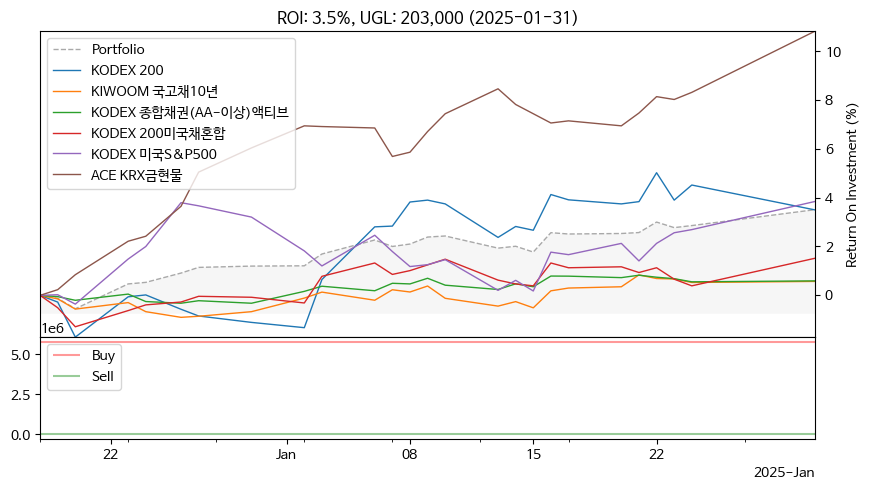

In [26]:
pf_wtr.plot(total=False)

In [19]:
date = None
pf_wtr.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-18, 2025-01-31, 10050258, 437605, 10063722, 451069, 0.044881363618978654


start    2024-07-18
end      2025-01-31
buy      10,050,258
sell        437,605
value    10,063,722
ugl         451,069
roi        0.044881
dtype: object

In [20]:
#pf_wtr.performance(metrics=METRICS)

In [21]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [22]:
nshares = True
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=nshares
)
_ = pf_wtr.transaction_pipeline(**kwargs)
pf_wtr.view_record(-2, nshares=nshares)

6 tickers selected by All from 2025-01-31 to 2025-01-31
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: 4.6%, UGL: 461,455 (2025-01-31)
Set save=True to save transaction record


name   price  transaction  net  weight  \
date       ticker                                                           
2024-11-20 069500             KODEX 200   32902            7   49  0.1670   
           148070          KOSEF 국고채10년  113034           -1   13  0.1670   
           273130  KODEX 종합채권(AA-이상)액티브  114815            0   14  0.1670   
           284430        KODEX 200미국채혼합   12585            4  128  0.1670   
           379800      KODEX 미국S&P500TR   18790           -8   86  0.1670   
           411060            ACE KRX금현물   17040          -10   96  0.1670   
2025-01-31 069500             KODEX 200   33445            0   50  0.1667   
           148070         KIWOOM 국고채10년  114725            0   14  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  116910            0   14  0.1667   
           284430        KODEX 200미국채혼합   13005           -1  128  0.1667   
           379800        KODEX 미국S&P500   20225           -4   82  0.1667   
           411060            ACE KRX금현물   18975           -8   88  0.1667   

                   weight*      date*  
date       ticker                      
2024-11-20 069500    0.168 2024-11-20  
           148070    0.158 2024-11-20  
           273130    0.167 2024-11-20  
           284430    0.169 2024-11-20  
           379800    0.168 2024-11-20  
           411060    0.170 2024-11-20  
2025-01-31 069500    0.169 2025-01-31  
           148070    0.162 2025-01-31  
           273130    0.165 2025-01-31  
           284430    0.168 2025-01-31  
           379800    0.167 2025-01-31  
           411060    0.169 2025-01-31

## LIQ

In [27]:
pf_liq = PM.create_portfolio('LIQ', **kw_cost)

24 securities from 2022-01-03 to 2025-01-31 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2024-01-03 loaded


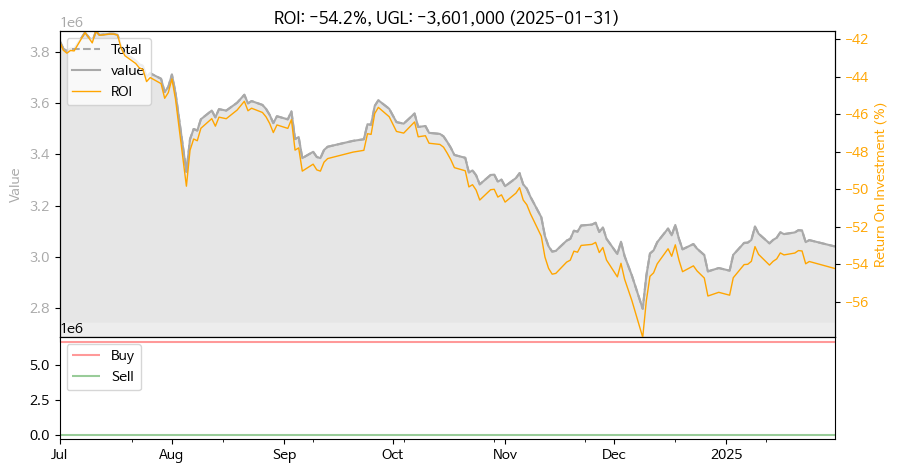

In [28]:
#date=None
date='2024-07-01'
pf_liq.plot(start_date=date)

In [49]:
pf_liq.valuate()

start    2024-01-03
end      2025-01-20
buy       6,642,320
sell            0.0
value     3,095,602
ugl      -3,546,718
roi       -0.533958
dtype: object

In [27]:
pf_liq.view_record()

name     ratio  transaction     net  weight  weight*  \
date       ticker                                                            
2024-01-03 011780     금호석유  0.750877       342000  342000     NaN    0.051   
           066570     LG전자  0.812245       245000  245000     NaN    0.037   
           035890     서희건설  0.760000       298800  298800     NaN    0.045   
           040420  정상제이엘에스  0.875784       294890  294890     NaN    0.044   
           140520     대창스틸  0.803077       292500  292500     NaN    0.044   
           072990    에이치시티  0.542767       286200  286200     NaN    0.043   
           091580    상신이디피  0.918452       302400  302400     NaN    0.046   
           011200      HMM  0.755977       289850  289850     NaN    0.044   
           002220     한일철강  0.768371       297350  297350     NaN    0.045   
           006650     대한유화  0.832507       181500  181500     NaN    0.027   
           136490       선진  0.524409       292100  292100     NaN    0.044   
           064550    바이오니아  0.707956       297900  297900     NaN    0.045   
           460860     동국제강  0.599797       149784  149784     NaN    0.023   
           040910     아이씨디  0.741803       292800  292800     NaN    0.044   
           024950   삼천리자전거  0.675537       293100  293100     NaN    0.044   
           900070   글로벌에스엠  0.516667       299160  299160     NaN    0.045   
           036580      팜스코  0.523810       298410  298410     NaN    0.045   
           184230  SGA솔루션즈  0.589354       299820  299820     NaN    0.045   
           460850     동국씨엠  0.383273        90275   90275     NaN    0.014   
           016250  SGC E&C  0.409565       276000  276000     NaN    0.042   
           001230    동국홀딩스  0.354766        48088   48088     NaN    0.007   
           049470      SGA  0.528251       299935  299935     NaN    0.045   
           217820    원익피앤이  0.485701       275396  275396     NaN    0.041   
           109960   AP헬스케어  0.218206       598820  598820     NaN    0.090   

                       date*  
date       ticker             
2024-01-03 011780 2024-01-03  
           066570 2024-01-03  
           035890 2024-01-03  
           040420 2024-01-03  
           140520 2024-01-03  
           072990 2024-01-03  
           091580 2024-01-03  
           011200 2024-01-03  
           002220 2024-01-03  
           006650 2024-01-03  
           136490 2024-01-03  
           064550 2024-01-03  
           460860 2024-01-03  
           040910 2024-01-03  
           024950 2024-01-03  
           900070 2024-01-03  
           036580 2024-01-03  
           184230 2024-01-03  
           460850 2024-01-03  
           016250 2024-01-03  
           001230 2024-01-03  
           049470 2024-01-03  
           217820 2024-01-03  
           109960 2024-01-03

## TDF

In [50]:
selected = None

In [51]:
pf_tdf = PM.create_portfolio('TDF_2406', tickers=selected, cost=file_cost)
pf_tdf.view_record()

64 securities from 2008-11-28 to 2024-12-31 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2025-01-15 loaded


name  ratio  \
date       ticker                                                             
2024-06-19 K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
2025-01-15 K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-06-19 K55301BU6139      5000000  5000000  0.5000    0.500 2024-06-19  
           K55206C95800      5000000  5000000  0.5000    0.500 2024-06-19  
2025-01-15 K55206C95800            0  5077506  0.1429    0.144 2025-01-15  
           K55301BU6139            0  5077009  0.1429    0.144 2025-01-15  
           K55364CF7048      5000000  5000000  0.1429    0.142 2025-01-15  
           K55234BY9966      5000000  5000000  0.1429    0.142 2025-01-15  
           K55213C50702      5000000  5000000  0.1429    0.142 2025-01-15  
           K55234DF3150      5000000  5000000  0.1429    0.142 2025-01-15  
           K55301BU6253      5000000  5000000  0.1429    0.142 2025-01-15

In [52]:
#pf_tdf.portfolio_data['strategy']
#pf_tdf.get_names()

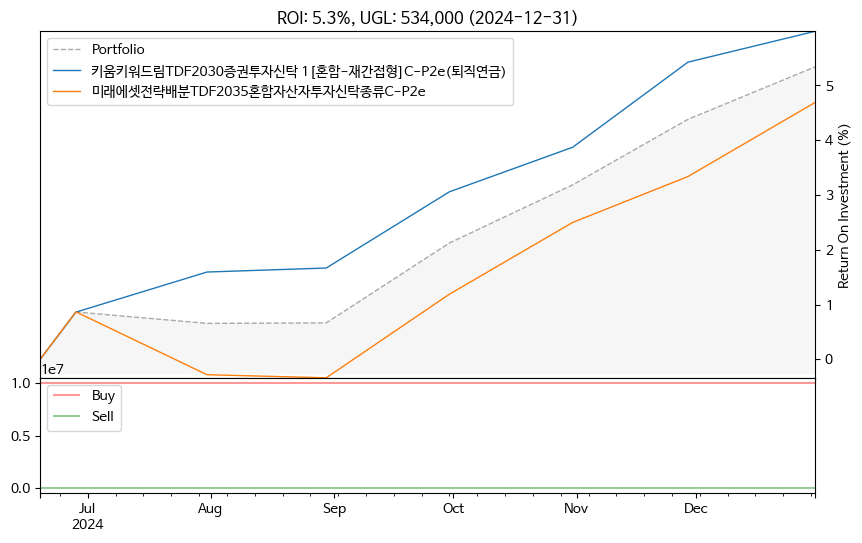

In [53]:
pf_tdf.plot(total=False)

In [56]:
date = None
_ = pf_tdf.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-06-19, 2024-12-31, 10000000, 0.0, 10533942, 533942, 0.05339420000000006


In [57]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [58]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_tdf.transaction_pipeline(**kwargs)

pf_tdf.view_record()

Liquidation set to None
64 tickers selected by All from 2024-12-31 to 2024-12-31
ERROR: check the date as no new transaction
ROI: 5.3%, UGL: 533,942 (2024-12-31)


name  ratio  \
date       ticker                                                             
2024-06-19 K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
2025-01-15 K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-06-19 K55301BU6139      5000000  5000000  0.5000    0.500 2024-06-19  
           K55206C95800      5000000  5000000  0.5000    0.500 2024-06-19  
2025-01-15 K55206C95800            0  5077506  0.1429    0.144 2025-01-15  
           K55301BU6139            0  5077009  0.1429    0.144 2025-01-15  
           K55364CF7048      5000000  5000000  0.1429    0.142 2025-01-15  
           K55234BY9966      5000000  5000000  0.1429    0.142 2025-01-15  
           K55213C50702      5000000  5000000  0.1429    0.142 2025-01-15  
           K55234DF3150      5000000  5000000  0.1429    0.142 2025-01-15  
           K55301BU6253      5000000  5000000  0.1429    0.142 2025-01-15

## HANA

In [66]:
#selected = ['KR5101888398', 'KR5236AS4826', 'KR5370AP9956', 'K55306CV9946']
selected = None

In [67]:
pf_hana = PM.create_portfolio('HANA_2408', tickers=selected, **kw_cost)
pf_hana.view_record()

64 securities from 2008-11-28 to 2024-12-31 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2024-08-01 loaded


name  ratio  \
date       ticker                                                       
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 KR5101888398      5020000  5020000   0.502    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000   0.242    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000   0.186    0.186 2024-08-01  
           K55306CV9946       690000   690000   0.069    0.069 2024-08-01

In [68]:
#pf_hana.portfolio_data['strategy']
#pf_hana.cost
#pf_hana.get_names()

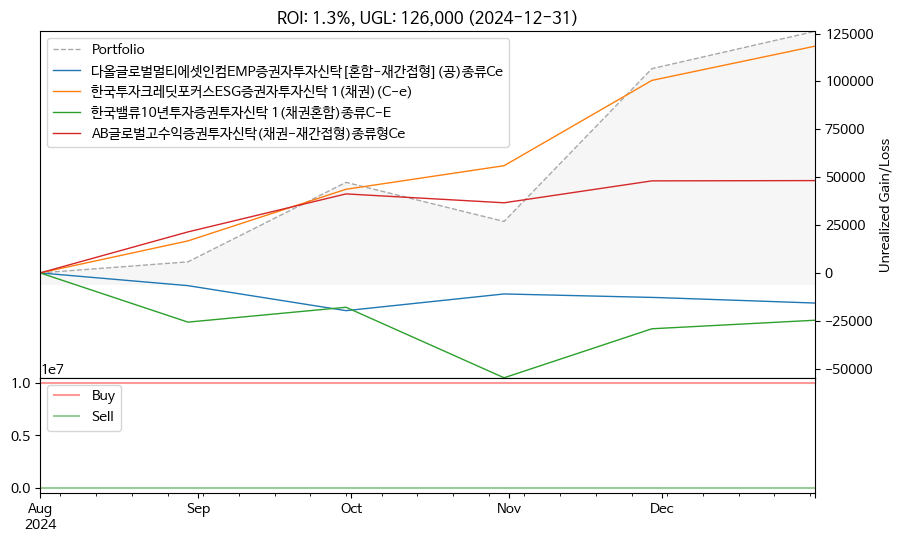

In [69]:
pf_hana.plot(total=False, roi=False)

In [70]:
date = None
_ = pf_hana.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-08-01, 2024-12-31, 9990000, 0.0, 10116192, 126192, 0.012631831831831919


In [63]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [64]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_hana.transaction_pipeline(**kwargs)
pf_hana.view_record()

Liquidation set to None
64 tickers selected by All from 2022-12-31 to 2024-12-31
Weights of tickers determined by Inv.Vol.
Mean absolute error of weights: 2 %
ROI: 0.5%, UGL: 102,525 (2024-12-31)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                         
2024-08-01 KR5101888398          한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826             한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956             AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
           K55306CV9946    다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
2024-12-31 K55234DF2657    IBK로우코스트TDF2030증권자투자신탁[혼합-재간접형]종류C-Re      1   
...                                                          ...    ...   
           K55105BT9936  삼성한국형TDF2035증권투자신탁H[주식혼합-재간접형]Cpe(퇴직연금)      1   
           K55223BT1096       KB온국민TDF2030증권투자신탁(주식혼합-재간접형)C-퇴직e      1   
           K55301BU6113         미래에셋전략배분TDF2030혼합자산자투자신탁 종류C-P2e      1   
           K55101BT4402    한국투자TDF알아서2030증권투자신탁(주식혼합-재간접형)(C-Re)      1   
           K55370BU1979           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce-P      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 KR5101888398      5020000  5020000  0.5020    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000  0.2420    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000  0.1860    0.186 2024-08-01  
           K55306CV9946       690000   690000  0.0690    0.069 2024-08-01  
2024-12-31 K55234DF2657       188540   188539  0.0187    0.019 2024-12-31  
...                              ...      ...     ...      ...        ...  
           K55105BT9936       125106   125106  0.0124    0.012 2024-12-31  
           K55223BT1096       154708   154708  0.0154    0.015 2024-12-31  
           K55301BU6113       202377   202377  0.0201    0.020 2024-12-31  
           K55101BT4402       176931   176930  0.0176    0.018 2024-12-31  
           K55370BU1979       195067   195066  0.0193    0.019 2024-12-31  

[68 rows x 7 columns]

# testing

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

In [5]:
file = 'kospi200_ratios.csv'
df_ratio = FinancialRatios.util_get_ratio('PER', file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-01-03 loaded


In [5]:
#pf_per = PM.create_portfolio('PER_2410', df_additional=df_ratio, **kw_cost)

200 securities from 2022-01-03 to 2025-01-20 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2024-11-11 loaded
Run check_universe to get the list of missing assets


In [8]:
pf_mmt = PM.create_portfolio('MMT_2407', **kw_cost) 

200 securities from 2022-01-03 to 2025-01-20 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2025-01-16 loaded


In [4]:
from pf_utils import PortfolioBuilder as PB 

k200 = PM.create_universe('UV_K200')
df_prices = k200.df_prices
security_names = k200.get_names()

kw_st = PM.review_portfolio('MMT_2407', strategy=True)
kw_tr = dict(file='test2', path=path_tran)
cost = PM.get_cost('UV_WTR', file_cost, path_tran)

pf_mmt = PB(df_prices, security_names=security_names, cost=cost, **kw_st, **kw_tr)

200 securities from 2022-01-03 to 2025-01-20 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2025-01-16 loaded
Trading of assets 003230, 012450 to halt


### testing

In [4]:
from pf_utils import PortfolioBuilder as PB 
import pandas as pd

def test_liq(file_price, file_tran='test3', universe='UV_K200'):
    k200 = PM.create_universe(universe, file=file_price)
    df_prices = k200.df_prices
    security_names = k200.get_names()
    
    kw_st = PM.review_portfolio('MMT_2407', strategy=True)
    kw_tr = dict(file=file_tran, path=path_tran)
    cost = PM.get_cost(universe, file_cost, path_tran)

    return PB(df_prices, security_names=security_names, cost=cost, **kw_st, **kw_tr)

In [5]:
#f = 'kospi200_prices_240823' # w/ test3_240822
#f = 'kospi200_prices_240910' # 012450 in halt w/ test3_240822
f = 'kospi200_prices_240927' # resume: 012450, new buy 489790
pf_mmt = test_liq(f)

200 securities from 2021-01-04 to 2024-09-27 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2024-09-10 loaded
Trading of assets 012450 to halt


In [7]:
pf_mmt.record
#pf_mmt.record_halt

name     ratio  transaction        net  weight  \
date       ticker                                                          
2024-07-22 000150           두산  0.972500    2600000.0  2600000.0   0.189   
           003230         삼양식품  0.995290    3185000.0  3185000.0   0.227   
           010120  LS ELECTRIC  0.986486    2664000.0  2664000.0   0.181   
           042700        한미반도체  0.975839    2980000.0  2980000.0   0.205   
           267260     HD현대일렉트릭  0.936306    2826000.0  2826000.0   0.198   
2024-08-22 000150           두산  0.998645   -1918800.0        0.0   0.000   
           003230         삼양식품  0.996071     509000.0  3054000.0   0.217   
           010120  LS ELECTRIC  0.980505   -2092800.0        0.0   0.000   
           042700        한미반도체  0.980504     123100.0  2585100.0   0.186   
           079550       LIG넥스원  0.982902    2702000.0  2702000.0   0.199   
           267260     HD현대일렉트릭  0.988994    -318000.0  2544000.0   0.192   
2024-09-10 000100         유한양행  1.000000    1928000.0  1928000.0   0.200   
           003230         삼양식품  1.000000   -1530000.0  1530000.0   0.200   
           036460       한국가스공사  1.000000    1917800.0  1917800.0   0.200   
           042700        한미반도체  1.000000   -2024400.0        0.0   0.000   
           079550       LIG넥스원  1.000000    -740800.0  1852000.0   0.200   
           267260     HD현대일렉트릭  1.000000    -255500.0  1788500.0   0.200   

                       date*  price  
date       ticker                    
2024-07-22 000150 2024-07-22    NaN  
           003230 2024-07-22    NaN  
           010120 2024-07-22    NaN  
           042700 2024-07-22    NaN  
           267260 2024-07-22    NaN  
2024-08-22 000150 2024-08-22    NaN  
           003230 2024-08-22    NaN  
           010120 2024-08-22    NaN  
           042700 2024-08-22    NaN  
           079550 2024-08-22    NaN  
           267260 2024-08-22    NaN  
2024-09-10 000100 2024-09-10    NaN  
           003230 2024-09-10    NaN  
           036460 2024-09-10    NaN  
           042700 2024-09-10    NaN  
           079550 2024-09-10    NaN  
           267260 2024-09-10    NaN

In [8]:
pf_mmt.valuate(print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-22, 2024-09-27, 21435680, 8863992, 10286150, -2285538, -0.10662306381693187


start    2024-07-22
end      2024-09-27
buy      21,435,680
sell      8,863,992
value    10,286,150
ugl      -2,285,538
roi       -0.106623
dtype: object

In [9]:
kw = dict(
    date = None,
    sell=['036460'],
    #sell={'036460': 3000000},
    #sell=['012450'],
    #resume={'012450': 3000000},
    #resume='all',
    buy={'000150': 3000000},
    halt = ['079550'],
    #halt = ['036460'],
    #save = True
)
#res = pf_mmt.tradinghalts.transaction('2024-09-27', **kw) 
#res[0]
pf_mmt.transaction_halt(**kw) 

Trading of assets 079550 to halt
Set save=True to save transaction record


name     ratio  transaction        net  weight  \
date       ticker                                                              
2024-07-22 000150               두산  0.972500    2600000.0  2600000.0   0.189   
           003230             삼양식품  0.995290    3185000.0  3185000.0   0.227   
           010120      LS ELECTRIC  0.986486    2664000.0  2664000.0   0.181   
           042700            한미반도체  0.975839    2980000.0  2980000.0   0.205   
           267260         HD현대일렉트릭  0.936306    2826000.0  2826000.0   0.198   
2024-08-22 000150               두산  0.998645   -1918800.0        0.0   0.000   
           003230             삼양식품  0.996071     509000.0  3054000.0   0.217   
           010120      LS ELECTRIC  0.980505   -2092800.0        0.0   0.000   
           042700            한미반도체  0.980504     123100.0  2585100.0   0.186   
           267260         HD현대일렉트릭  0.988994    -318000.0  2544000.0   0.192   
           HLT_012450    한화에어로스페이스  0.984071    2825000.0  2825000.0   0.206   
           HLT_079550       LIG넥스원  0.982902    2702000.0  2702000.0   0.199   
2024-09-10 000100             유한양행  1.000000    1928000.0  1928000.0   0.200   
           003230             삼양식품  1.000000   -1530000.0  1530000.0   0.200   
           036460           한국가스공사  1.000000    1917800.0  1917800.0   0.200   
           042700            한미반도체  1.000000   -2024400.0        0.0   0.000   
           267260         HD현대일렉트릭  1.000000    -255500.0  1788500.0   0.200   
           HLT_012450    한화에어로스페이스  1.000000          0.0  2825000.0     NaN   
           HLT_079550       LIG넥스원  1.000000    -740800.0  1852000.0   0.200   
2024-09-27 000100             유한양행  1.000000          0.0  1928000.0   0.200   
           000150              NaN  1.000000    3000000.0  3000000.0     NaN   
           003230             삼양식품  1.000000          0.0  1530000.0   0.200   
           036460           한국가스공사  1.000000   -1917800.0        0.0   0.200   
           267260         HD현대일렉트릭  1.000000          0.0  1788500.0   0.200   
           HLT_012450    한화에어로스페이스  1.000000          0.0  2825000.0     NaN   
           HLT_079550       LIG넥스원  1.000000          0.0  1852000.0     NaN   

                           date*  price  
date       ticker                        
2024-07-22 000150     2024-07-22    NaN  
           003230     2024-07-22    NaN  
           010120     2024-07-22    NaN  
           042700     2024-07-22    NaN  
           267260     2024-07-22    NaN  
2024-08-22 000150     2024-08-22    NaN  
           003230     2024-08-22    NaN  
           010120     2024-08-22    NaN  
           042700     2024-08-22    NaN  
           267260     2024-08-22    NaN  
           HLT_012450 2024-08-22    NaN  
           HLT_079550 2024-08-22    NaN  
2024-09-10 000100     2024-09-10    NaN  
           003230     2024-09-10    NaN  
           036460     2024-09-10    NaN  
           042700     2024-09-10    NaN  
           267260     2024-09-10    NaN  
           HLT_012450 2024-09-10    NaN  
           HLT_079550 2024-09-10    NaN  
2024-09-27 000100     2024-09-27    NaN  
           000150     2024-09-27    NaN  
           003230     2024-09-27    NaN  
           036460     2024-09-27    NaN  
           267260     2024-09-27    NaN  
           HLT_012450 2024-09-27    NaN  
           HLT_079550 2024-09-27    NaN

In [10]:
kwargs_trs = dict(
    #date = '2025-01-01',
    capital = 0,
    #save = True,
    #nshares=True
)

_ = pf_mmt.transaction_pipeline(**kwargs_trs)

5 tickers selected by Total return from 2023-09-20 to 2024-09-20
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 6 %
ROI: -9.8%, UGL: -2,290,782 (2024-09-27)
Set save=True to save transaction record


In [11]:
pf_mmt.view_record(-1)

name  ratio  transaction      net  weight  weight*  \
date       ticker                                                           
2024-09-27 000100      유한양행    1.0      -292200  2045400     0.2    0.215   
           003230      삼양식품    1.0            0  1614000     0.2    0.170   
           036460    한국가스공사    1.0     -1993050        0     0.0    0.000   
           079550    LIG넥스원    1.0      -210500  1894500     0.2    0.199   
           259960      크래프톤    1.0      2043000  2043000     0.2    0.215   
           267260  HD현대일렉트릭    1.0      -319500  1917000     0.2    0.201   

                       date*  
date       ticker             
2024-09-27 000100 2024-09-27  
           003230 2024-09-27  
           036460 2024-09-27  
           079550 2024-09-27  
           259960 2024-09-27  
           267260 2024-09-27

In [15]:
pf_mmt.record_halt

,,name,ratio,transaction,net,weight,date*,price
date,ticker,,,,,,,
2024-08-22,HLT_012450,한화에어로스페이스,0.984071,2825000.0,2825000.0,0.206,2024-08-22,NaN
2024-09-10,HLT_012450,한화에어로스페이스,1.000000,0.0,2825000.0,NaN,2024-09-10,NaN


## testing

In [72]:
self = pf_mmt
df_rec = pf_mmt.record
df_rec[cols_int].dtypes

transaction    float64
net            float64
dtype: object

In [74]:
df_rec[cols_int].isna().any().any()

False

In [76]:
self = pf_mmt
df_rec = pf_mmt.record
df_rec[cols_int].dtypes
cols_record = self.cols_record
col_date = cols_record['date']
col_tkr = cols_record['tkr']
col_name = cols_record['name']
col_rat = cols_record['rat']
col_trs = cols_record['trs']
col_net = cols_record['net']
col_wgt = cols_record['wgt']
col_dttr = cols_record['dttr']
cols_int = [col_trs, col_net]
df_rec[cols_int] = df_rec.loc[:, cols_int].astype(int)
df_rec

name     ratio  transaction      net  weight  \
date       ticker                                                         
2024-07-22 003230          삼양식품  0.995290      3185000  3185000   0.227   
           267260      HD현대일렉트릭  0.936306      2826000  2826000   0.198   
           042700         한미반도체  0.975839      2980000  2980000   0.205   
           000150            두산  0.972500      2600000  2600000   0.189   
           010120   LS ELECTRIC  0.986486      2664000  2664000   0.181   
2024-08-22 267260      HD현대일렉트릭  0.988994      -318000  2544000   0.192   
           003230          삼양식품  0.996071       509000  3054000   0.217   
           012450     한화에어로스페이스  0.984071      2825000  2825000   0.206   
           079550        LIG넥스원  0.982902      2702000  2702000   0.199   
           042700         한미반도체  0.980504       123100  2585100   0.186   
           000150            두산  0.998645     -1918800        0   0.000   
           010120   LS ELECTRIC  0.980505     -2092800        0   0.000   
2024-09-26 267260      HD현대일렉트릭  1.000000            0  2680000     NaN   
           003230          삼양식품  1.000000            0  3288000     NaN   
           012450     한화에어로스페이스  1.026549     -2825000        0     NaN   
           079550        LIG넥스원  1.000000            0  3024000     NaN   
           042700         한미반도체  1.000000            0  2398200     NaN   
2024-09-27 267260      HD현대일렉트릭  1.000000            0  2556000     NaN   
           003230          삼양식품  1.000000            0  3228000     NaN   
           079550        LIG넥스원  1.000000            0  2947000     NaN   
           042700         한미반도체  1.000000            0  2373000     NaN   
           012450     한화에어로스페이스  1.121774      2543292  2543292     NaN   
           489790  한화인더스트리얼솔루션즈  1.000000       281709   281709     NaN   
2024-10-08 267260      HD현대일렉트릭  1.000000            0  2568000   0.182   
           012450     한화에어로스페이스  1.000000            0  3280500   0.210   
           079550        LIG넥스원  1.004107      -730500  2678500   0.192   
           003230          삼양식품  1.000000            0  3144000   0.216   
           011790           SKC  1.001302      3072000  3072000   0.200   
           042700         한미반도체  0.993525     -2270100        0     NaN   
           489790  한화인더스트리얼솔루션즈  1.035578      -354150        0     NaN   
2024-11-11 267260      HD현대일렉트릭  1.000000            0  3120000   0.200   
           012450     한화에어로스페이스  1.030979      -807000  2824500   0.200   
           079550        LIG넥스원  1.000000            0  2926000   0.200   
           003230          삼양식품  0.998224      -563000  2815000   0.200   
           064350          현대로템  1.012638      3038400  3038400   0.200   
           011790           SKC  0.995538     -2442900        0     NaN   
2024-12-16 267260      HD현대일렉트릭  0.975610      -389500  2726500   0.200   
           010130          고려아연  1.000858      2330000  2330000   0.200   
           003230          삼양식품  1.000000     -1458000  2187000   0.200   
           000150            두산  0.963303      2725000  2725000   0.200   
           298040         효성중공업  0.985808      2290000  2290000   0.200   
           012450     한화에어로스페이스  1.040650     -2152501        0   0.000   
           064350          현대로템  1.026943     -2316000        0   0.000   
           079550        LIG넥스원  1.004130     -2130700        0   0.000   
2025-01-16 267260      HD현대일렉트릭  1.000000            0  2922500   0.200   
           003230          삼양식품  1.000000            0  2310000   0.200   
           000150            두산  1.000000            0  2880000   0.200   
           012450     한화에어로스페이스  1.031414      2673999  2674000   0.200   
           010120   LS ELECTRIC  0.899535      3225000  3225000   0.200   
           010130          고려아연  0.957796     -1706000        0   0.000   
           298040         효성중공업  0.997872     -2350000        0   0.000   
2025-01-31 267260      HD현대일렉트릭  1.000000      -4100

In [59]:
df_rec.loc[:, cols_int].astype(int).sort_index(level=[0,1])
df_rec.loc[:, cols_int]

transaction        net
date       ticker                        
2024-07-22 003230    3185000.0  3185000.0
           267260    2826000.0  2826000.0
           042700    2980000.0  2980000.0
           000150    2600000.0  2600000.0
           010120    2664000.0  2664000.0
2024-08-22 267260    -318000.0  2544000.0
           003230     509000.0  3054000.0
           012450    2825000.0  2825000.0
           079550    2702000.0  2702000.0
           042700     123100.0  2585100.0
           000150   -1918800.0        0.0
           010120   -2092800.0        0.0
2024-09-26 267260          0.0  2680000.0
           003230          0.0  3288000.0
           012450   -2825000.0        0.0
           079550          0.0  3024000.0
           042700          0.0  2398200.0
2024-09-27 267260          0.0  2556000.0
           003230          0.0  3228000.0
           079550          0.0  2947000.0
           042700          0.0  2373000.0
           012450    2543292.0  2543292.0
           489790     281709.0   281709.0
2024-10-08 267260          0.0  2568000.0
           012450          0.0  3280500.0
           079550    -730500.0  2678500.0
           003230          0.0  3144000.0
           011790    3072000.0  3072000.0
           042700   -2270100.0        0.0
           489790    -354150.0        0.0
2024-11-11 267260          0.0  3120000.0
           012450    -807000.0  2824500.0
           079550          0.0  2926000.0
           003230    -563000.0  2815000.0
           064350    3038400.0  3038400.0
           011790   -2442900.0        0.0
2024-12-16 267260    -389500.0  2726500.0
           010130    2330000.0  2330000.0
           003230   -1458000.0  2187000.0
           000150    2725000.0  2725000.0
           298040    2290000.0  2290000.0
           012450   -2152501.0        0.0
           064350   -2316000.0        0.0
           079550   -2130700.0        0.0
2025-01-16 267260          0.0  2922500.0
           003230          0.0  2310000.0
           000150          0.0  2880000.0
           012450    2673999.0  2674000.0
           010120    3225000.0  3225000.0
           010130   -1706000.0        0.0
           298040   -2350000.0        0.0
2025-01-31 267260    -410000.0  2460000.0
           000150    -284000.0  2556000.0
           010120    -693000.0  2772000.0
           003230     684000.0  2736000.0
           012450          0.0  2800000.0

In [5]:
def update_record(self, security_names=None, save=True, update_var=True):
    """
    update amount-based & ticker names with the saved record
    save: overwrite record file if True
    """
    # reload record w/ full transaction history first
    record = self.import_record(halt=False, msg=False)
    if record is None:
        return None
    else:
        df_rec = record.copy()

    # update col_rat and convert record from num of shares to amount
    df_prc = self._update_universe(df_rec, msg=False)
    df_rec = self._update_price_ratio(df_rec, df_prc)
    df_rec = self._convert_to_amount(df_rec, df_prc)
    return df_rec
    
    # update ticker name
    df_rec = self._update_ticker_name(df_rec, security_names)

    return df_rec

In [6]:
update_record(pf_mmt)

name     ratio  transaction      net  weight  \
date       ticker                                                         
2024-07-22 003230          삼양식품  0.995290      3185000  3185000   0.227   
           267260      HD현대일렉트릭  0.936306      2826000  2826000   0.198   
           042700         한미반도체  0.975839      2980000  2980000   0.205   
           000150            두산  0.972500      2600000  2600000   0.189   
           010120   LS ELECTRIC  0.986486      2664000  2664000   0.181   
2024-08-22 267260      HD현대일렉트릭  0.988994      -318000  2544000   0.192   
           003230          삼양식품  0.996071       509000  3054000   0.217   
           012450     한화에어로스페이스  0.984071      2825000  2825000   0.206   
           079550        LIG넥스원  0.982902      2702000  2702000   0.199   
           042700         한미반도체  0.980504       123100  2585100   0.186   
           000150            두산  0.998645     -1918800        0   0.000   
           010120   LS ELECTRIC  0.980505     -2092800        0   0.000   
2024-09-26 267260      HD현대일렉트릭  1.000000            0  2680000     NaN   
           003230          삼양식품  1.000000            0  3288000     NaN   
           012450     한화에어로스페이스  1.026549     -2825000        0     NaN   
           079550        LIG넥스원  1.000000            0  3024000     NaN   
           042700         한미반도체  1.000000            0  2398200     NaN   
2024-09-27 267260      HD현대일렉트릭  1.000000            0  2556000     NaN   
           003230          삼양식품  1.000000            0  3228000     NaN   
           079550        LIG넥스원  1.000000            0  2947000     NaN   
           042700         한미반도체  1.000000            0  2373000     NaN   
           012450     한화에어로스페이스  1.121774      2543292  2543292     NaN   
           489790  한화인더스트리얼솔루션즈  1.000000       281709   281709     NaN   
2024-10-08 267260      HD현대일렉트릭  1.000000            0  2568000   0.182   
           012450     한화에어로스페이스  1.000000            0  3280500   0.210   
           079550        LIG넥스원  1.004107      -730500  2678500   0.192   
           003230          삼양식품  1.000000            0  3144000   0.216   
           011790           SKC  1.001302      3072000  3072000   0.200   
           042700         한미반도체  0.993525     -2270100        0     NaN   
           489790  한화인더스트리얼솔루션즈  1.035578      -354150        0     NaN   
2024-11-11 267260      HD현대일렉트릭  1.000000            0  3120000   0.200   
           012450     한화에어로스페이스  1.030979      -807000  2824500   0.200   
           079550        LIG넥스원  1.000000            0  2926000   0.200   
           003230          삼양식품  0.998224      -563000  2815000   0.200   
           064350          현대로템  1.012638      3038400  3038400   0.200   
           011790           SKC  0.995538     -2442900        0     NaN   
2024-12-16 267260      HD현대일렉트릭  0.975610      -389500  2726500   0.200   
           010130          고려아연  1.000858      2330000  2330000   0.200   
           003230          삼양식품  1.000000     -1458000  2187000   0.200   
           000150            두산  0.963303      2725000  2725000   0.200   
           298040         효성중공업  0.985808      2290000  2290000   0.200   
           012450     한화에어로스페이스  1.040650     -2152501        0   0.000   
           064350          현대로템  1.026943     -2316000        0   0.000   
           079550        LIG넥스원  1.004130     -2130700        0   0.000   
2025-01-16 267260      HD현대일렉트릭  1.000000            0  2922500   0.200   
           003230          삼양식품  1.000000            0  2310000   0.200   
           000150            두산  1.000000            0  2880000   0.200   
           012450     한화에어로스페이스  1.031414      2673999  2674000   0.200   
           010120   LS ELECTRIC  0.899535      3225000  3225000   0.200   
           010130          고려아연  0.957796     -1706000        0   0.000   
           298040         효성중공업  0.997872     -2350000        0   0.000   
2025-01-31 267260      HD현대일렉트릭  1.000000      -4100